# Design a Phone with the Materials Project

Today, you will leverage the properties computed by the [Materials Project](https://materialsproject.org) to design a mobile phone.

## The Materials Project dataset

The Materials Project is an organisation based at Lawrence Berkeley National Laboratory that aims to calculate the properties of all known materials. With this knowledge, we can accelerate the discovery of new materials without having to perform any experiments. All our calculations are performed on supercomputers, allowing our computations, data, and algorithms to run at unparalleled speed. 

The dataset you will be exploring has been compiled from the Materials Project database of calculated material properties. It only includes crystalline materials (think diamond, metals, metal oxides such as rust, etc) and not amorphous materials (such as rubber, plastics, or glass). In the database you will be exploring, we have only included the properties that are useful for choosing mobile phone components:

- `material_id`: This is the identification number of the material. You can use this to search the material on the Materials Project website. For example, you can see more information about the first material in the dataset (mp-770629) by going to the following url: https://materialsproject.org/materials/mp-770629
- `formula`: The chemical formula indicating the number and type of elements in the material.
- `cost`: The cost of the raw elements in the material in \$/kg.
- `scarcity`: How scarce the raw elements are. Larger numbers indicate that the elements will be harder to find and occur less frequently in the earths crust.
- `density`: The density of the material in g/cm<sup>3</sup>.
- `conductivity`: The conductivity of the material. Larger numbers indicate the material is more conductive.
- `transparency`: The transparency of the material. Larger numbers indicate the material is more transparent.
- `hardness`: The hardness of the material. Larger numbers indicate stronger materials.
- `voltage`: The maximum obtainable voltage if the material is used in a battery.
- `capacitance`: The maximum obtainable capacitance if the material is used in a battery.

To start with, let's load the dataset as a Pandas `DataFrame`.

In [2]:
import pandas as pd

material_data = pd.read_csv("https://raw.githubusercontent.com/utf/mp-bldap/master/resources/materials_project_dataset.csv")

### Manipulating and examining pandas `DataFrame` objects

You can think of `DataFrame` objects as a type of "spreadsheet" object in Python. DataFrames have several useful methods you can use to explore and clean the data, some of which we'll explore below.

#### Inspecting the dataset

The `head()` function prints a summary of the first few rows of a data set. You can scroll across to see more columns. From this, it is easy to see the types of data available in in the dataset. Some values are `NaN` which means 'not a number' to indicate missing data. Missing data might mean that we have not calculated that property yet, for example.

In [3]:
material_data.head()

,material_id,formula,cost,scarcity,density,conductivity,transparency,hardness,voltage,capacitance
0,mp-770629,Li2AlFeO4,1.952298,1552.243517,3.023458,1.245410e+01,0.966469,NaN,NaN,NaN
1,mp-623511,Sn,34.700719,2600.000000,6.874796,2.276340e+06,0.000000,NaN,NaN,NaN
2,mp-1992,Pu5Ru3,7.834971,6459.268594,15.235961,1.626970e+04,0.000000,NaN,NaN,NaN
3,mp-27502,CNCl,5.687806,1259.037846,1.411098,3.200250e+01,1.000000,NaN,NaN,NaN
4,mp-27202,B9H8S,66.675527,16119.098917,1.084741,1.479050e+00,1.000000,NaN,NaN,NaN


In [4]:
material_data[material_data['formula'] == 'Al']

,material_id,formula,cost,scarcity,density,conductivity,transparency,hardness,voltage,capacitance
40840,mp-134,Al,2.460356,1600.0,2.72005,3132330.0,0.0,83.0,NaN,NaN


You can immediately see that not all properties are available for every material. For example, the hardness, voltage, and capacitance values are empty (set to `NaN` which means 'not a number') for the first 5 materials shown above. 

Sometimes, if a dataset is very large, you will be unable to see all the available columns. Instead, you can see the full list of columns using the `columns` attribute:

In [5]:
material_data.columns

Index(['material_id', 'formula', 'cost', 'scarcity', 'density', 'conductivity',
       'transparency', 'hardness', 'voltage', 'capacitance'],
      dtype='object')

#### Indexing the dataset

We can access a particular column of `DataFrame` by indexing the object using the column name. For example:

In [6]:
material_data["formula"]

0               Li2AlFeO4
1                      Sn
2                  Pu5Ru3
3                    CNCl
4                   B9H8S
               ...       
48029           MgVCu3Se4
48030        MgCu3(SnO3)4
48031    Ba2Mg3Tl2(NiO3)4
48032         HoMg(MoO3)2
48033        Mg3Ge3(WO6)2
Name: formula, Length: 48034, dtype: object

Alternatively, we can access a particular row of a `Dataframe` using the `iloc` attribute.

In [7]:
material_data.iloc[100]

material_id         mp-28856
formula             Na7Au5S6
cost            33432.980243
scarcity         1042.490805
density             5.163261
conductivity         41.1844
transparency        0.692437
hardness                 NaN
voltage                  NaN
capacitance              NaN
Name: 100, dtype: object

#### Filtering the dataset

Pandas `DataFrame` objects make it very easy to filter the data based on a specific column. We can use the typical Python comparison operators (==, >, >=, <, etc) to filter numerical values. For example, let's find all entries where the cell density is greater than 5. We do this by filtering on the `density` column.

Note that we first produce a series of `True` and `False` depending on the comparison. We can then use this filter to index the `DataFrame`. 

In [8]:
density_filter = material_data["density"] >= 5
material_data[density_filter]

,material_id,formula,cost,scarcity,density,conductivity,transparency,hardness,voltage,capacitance
1,mp-623511,Sn,34.700719,2600.000000,6.874796,2276340.0,0.000000,NaN,NaN,NaN
2,mp-1992,Pu5Ru3,7.834971,6459.268594,15.235961,16269.7,0.000000,NaN,NaN,NaN
9,mp-761284,Eu2Mn2O7,3757.686710,5932.134455,6.657756,22170.4,0.000000,NaN,NaN,NaN
15,mp-10367,HfSbRh,5333.410212,4708.028540,9.800231,646223.0,0.000000,98.0,NaN,NaN
17,mp-9761,ReO3,3713.052473,2726.165773,8.250241,207064.0,0.000000,183.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
48029,mp-1180276,MgVCu3Se4,84.734130,2229.220619,5.006681,NaN,0.000000,NaN,-0.098693,92.144929
48030,mp-1234169,MgCu3(SnO3)4,21.411548,2000.982222,6.379836,NaN,0.149375,NaN,1.890890,60.789787
48031,mvc-132,Ba2Mg3Tl2(NiO3)4,2078.755822,3548.438258,6.726161,NaN,0.000000,NaN,3.071616,135.921407
48032,mvc-10205,HoMg(MoO3)2,429.385627,4619.808417,6.547090,NaN,0.356625,NaN,1.982244,112.348870


## Task 1: Data cleaning

The first thing you should do with any dataset is make sure the data is formatted correctly and makes sense. If you start with garbage data, whatever analysis you perform is likely to produce garbage results. Even the Materials Project isn't immune to malformed or nonsensical data now and again.

Pandas `DataFrame`'s include a function called `describe()` that helps determine statistics for the various numerical/categorical columns in the data. You should use the `describe()` function to get a feel for the dataset. Look at the min and max values for each of the columns. Do you see anything strange?

In [9]:
# Complete cell below by replacing the "______"

material_data.describe()

,cost,scarcity,density,conductivity,transparency,hardness,voltage,capacitance
count,48034.000000,48034.000000,48034.000000,4.569900e+04,48034.000000,8089.000000,4390.000000,4390.000000
mean,3031.935592,4420.810506,4.846904,6.108239e+04,0.433507,93.864013,3.052816,161.053237
std,10033.980519,3357.555424,2.712017,1.868128e+05,0.404662,69.779670,1.426028,162.158006
min,0.003868,0.019492,-10.000000,1.993210e-05,0.000000,1.000000,-2.517818,5.176543
25%,21.206359,2137.341687,3.088638,1.068095e+01,0.000000,40.000000,2.202406,88.557687
50%,97.371773,3480.600901,4.214760,5.170200e+01,0.378984,77.000000,3.289276,131.701855
75%,596.592744,5654.284324,6.122398,1.900160e+04,0.867875,136.000000,4.044512,191.314388
max,270514.135021,19980.844102,24.579207,5.452180e+06,1.000000,591.000000,12.156334,2557.626897


If you noticed anything strange about the `"density"` column, well done. The density of a material is its mass per volume, therefore it doesn't make sense to have negative density — as a side note, negative density materials would allow us to [create wormholes through space and time](https://en.wikipedia.org/wiki/Negative_energy) but that is beyond the scope of this tutorial.

We can look into this discrepancy in more detail by plotting a histogram (distribution plot) of the density values. To do this, run the `plot.hist()` command on the `"density"` column. Create a histogram with 50 bins by using the `bins=` argument. Do you notice anything odd about the distribution?

<AxesSubplot:ylabel='Frequency'>

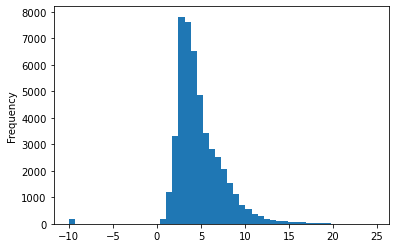

In [10]:
# Complete cell below by replacing the "______"

material_data["density"].plot.hist(bins=50)

That peak at around -10 indicates a signficant amount of the density data has been entered into the database incorrectly. We should remove all these outliers before doing any further analysis. To do this, we will overwrite the `material_data` variable with a dataframe containing materials with positive densities only. 

In [11]:
# Complete cell below by replacing the "______"

material_data = material_data[material_data["density"] > 0]

Let's check to make sure all negative density values were removed by running `describe()` again.

In [12]:
material_data.describe()

,cost,scarcity,density,conductivity,transparency,hardness,voltage,capacitance
count,47867.000000,47867.000000,47867.000000,4.553200e+04,47867.000000,8055.000000,4384.000000,4384.000000
mean,3031.201478,4419.606852,4.898702,6.113307e+04,0.433479,93.771322,3.050715,161.119062
std,10041.266812,3356.008189,2.570789,1.870017e+05,0.404653,69.753495,1.425397,162.252069
min,0.003868,0.019492,0.023670,1.993210e-05,0.000000,1.000000,-2.517818,5.176543
25%,21.173122,2136.817951,3.100269,1.068872e+01,0.000000,40.000000,2.200203,88.557687
50%,97.445072,3476.926109,4.222917,5.169205e+01,0.379031,77.000000,3.288148,131.753484
75%,596.578048,5654.716195,6.130078,1.903288e+04,0.867875,136.000000,4.043086,191.336676
max,270514.135021,19980.844102,24.579207,5.452180e+06,1.000000,591.000000,12.156334,2557.626897


## The Challenge: Designing a Mobile Phone

A mobile phone is constructed of multiple components. Each component has different material property requirements, summarised in the graphic below.

<br>
<img src="https://raw.githubusercontent.com/utf/mp-bldap/master/resources/phone-01.png" width=800px>

In addition to these requirements, all materials should also be:
- As cheap as possible (i.e., low cost).
- As available as possible (i.e., low scarcity).
- As light as possible (i.e., low density).

Your task in this session will be to choose materials that satisfy the above requirements. You choices will then be assessed to determine if they will make a good mobile phone.

The mobile phone manufacturers we are using have a hard limit on the scarcity of the materials they use. **You must make sure that the materials you choose are in the bottom 50 % of the scarcity of all materials.**

## Task 2: Calculating the cost per volume of material

In our dataset, the cost for each material is given per unit mass (in \\$/kg). However, when building a mobile phone, we generally know the volume of material we will need, not the mass. You should therefore add a new column to the dataset containing the cost per unit volume (in \\$/cm<sup>3</sup>).

To calculate the cost per volume, you will need to use the density (in g/cm<sup>3</sup>). The equation is:

$$
\text{cost per volume} = \text{cost per mass} \times \text{density}
$$

*BUT you will need to first convert the density to kg/cm<sup>3</sup>*.

**Aim**: Create a new column called `volume_cost` that contains the cost per volume in $/cm<sup>3</sup>.

*Hints*:

In Pandas, you can add a new column by giving it a name and assigning it the value of a mathematical operation *using other column names as variables*. For example, to make a new column "A times B" that contains the product of columns 'A' and 'B', you could write

```python
material_data["A times B"] = material_data["A"] * material_data["B"]
```

In [13]:
# Complete task below:

material_data["volume_cost"] = material_data["cost"] * material_data["density"] / 1000

You can check that the new column was added correctly buy calling the `head()` function on the dataframe.

In [14]:
material_data.head()

,material_id,formula,cost,scarcity,density,conductivity,transparency,hardness,voltage,capacitance,volume_cost
0,mp-770629,Li2AlFeO4,1.952298,1552.243517,3.023458,1.245410e+01,0.966469,NaN,NaN,NaN,0.005903
1,mp-623511,Sn,34.700719,2600.000000,6.874796,2.276340e+06,0.000000,NaN,NaN,NaN,0.238560
2,mp-1992,Pu5Ru3,7.834971,6459.268594,15.235961,1.626970e+04,0.000000,NaN,NaN,NaN,0.119373
3,mp-27502,CNCl,5.687806,1259.037846,1.411098,3.200250e+01,1.000000,NaN,NaN,NaN,0.008026
4,mp-27202,B9H8S,66.675527,16119.098917,1.084741,1.479050e+00,1.000000,NaN,NaN,NaN,0.072326


## Task 3: Choosing a protective casing material

How many times have you dropped your mobile phone? Did the screen crack? Imagine if the back of your phone was made of glass... it would be much more prone to breaking. Now you can understand the importance of having a hard and durable material to make up the protective back casing.

You need to decide what material you will use for the back of your phone. It needs to be hard but also cheap because you will use a lot of it. It should also have low elemental scarcity. 

**The protective casing will use 5 cm<sup>3</sup> of material.**

Requirements:
- Hardness: high (greater than 200)
- Total cost: low (less than $ 0.05)
- Scarcity: low (in the bottom 50% of all materials)

**Aim**: Choose a material for the back of your phone. You should assign the `material_id` of your chosen material to the `back_material` variable.


*Hints*:
You can chain filters together using `&` (and) and `|` (or). For example, 
```python
(material_data["density"] > 10) & (material_data["density"] < 20)
```
checks whether the density falls between 10 and 20, whereas
```python
(material_data["density"] < 10) | (material_data["density"] > 20)
```
checks whether the density falls outside the 10-20 range. **The brackets around the different clauses are required**.

The above lines will return a Series of `True` and `False` values for the rows that match or don't match the filter. To get a dataframe with the rows you want, you should index your dataframe with the filter. I.e.
```python
density_filter = (material_data["density"] > 10) & (material_data["density"] < 20)
material_data[density_filter]
```

In [15]:
# Complete task below:

hardness_filter = (
    (material_data["hardness"] > 200)
    & (material_data["volume_cost"] * 5 < 0.05)
    & (material_data["scarcity"] < 3476.926109)
)
material_data[hardness_filter].sort_values("density")

,material_id,formula,cost,scarcity,density,conductivity,transparency,hardness,voltage,capacitance,volume_cost
1750,mp-160,B,0.871045,2900.000000,2.476400,34.1649,0.448000,211.0,NaN,NaN,0.002157
34862,mp-758933,B8O,1.203398,2525.333846,2.533459,42.8376,0.734875,205.0,NaN,NaN,0.003049
13805,mp-30091,MgB9N,1.574431,3164.885293,2.577471,56.9569,0.542500,209.0,NaN,NaN,0.004058
39884,mp-1346,B6O,1.292264,2425.154640,2.596068,77.5256,0.603344,227.0,NaN,NaN,0.003355
30070,mp-568556,Mg2B24C,2.359958,3174.422114,2.598432,52.1041,0.821813,209.0,NaN,NaN,0.006132
7248,mp-644751,BN,0.709666,1996.986425,3.036918,35.3841,1.000000,303.0,NaN,NaN,0.002155
12400,mp-988,Si3N4,1.167194,3342.096957,3.134177,54.3047,1.000000,234.0,NaN,NaN,0.003658
37851,mp-603694,Si3N4,1.167194,3342.096957,3.211673,15022.3000,0.000000,221.0,NaN,NaN,0.003749
32691,mp-972839,SiBO3,2.267843,2156.090648,3.357762,438281.0000,0.000000,208.0,NaN,NaN,0.007615
21155,mp-11607,Si3N4,1.167194,3342.096957,3.411328,30.8126,1.000000,252.0,NaN,NaN,0.003982


Once you have decided on a protective casing material. Fill in the cell below with the material_id of the material of your choice.

In [16]:
# Complete task below by replacing mp_xxxxx

back_material = "mp-644751"

## Task 4: Choosing a battery material

The discovery of lithium-ion batteries is one of the greatest scientific achievements of the last 50 years and was recently recognised by 2019 Nobel Prize in Chemistry.

You need to choose a battery material for your phone using the battery properties calculated by the Materials Project. It should have a high voltage and large capactiance so that your customers can continue browsing TikTok as long as possible. Like all other materials in your phone, it should also be cheap and have low elemental scarcity.

**The battery will use 3 cm<sup>3</sup> of material.**

Requirements:
- Capacitance: high (greater than 320)
- Voltage: high (greater than 3.0)
- Total cost: low (less than $ 0.1)
- Scarcity: low (in the bottom 50% of all materials)

**Aim**: Choose a material for the battery of your phone. You should assign the `material_id` of your chosen material to the `battery_material` variable.

In [17]:
# Complete task below:

battery_filter = (
    (material_data["capacitance"] > 320)
    & (material_data["voltage"] > 3)
    & (material_data["volume_cost"] * 3 < 0.1)
    & (material_data["scarcity"] < 3476.926109)
)
material_data[battery_filter].sort_values("density")

,material_id,formula,cost,scarcity,density,conductivity,transparency,hardness,voltage,capacitance,volume_cost
31899,mp-570697,CaC2,12.026610,2625.842052,1.893619,23.24610,0.547969,NaN,10.519478,418.123748,0.022774
11133,mp-758209,Li2FeSiO4,1.798492,2090.638656,3.063633,59.40780,0.965437,NaN,4.892208,331.270809,0.005510
34313,mp-760214,Li6Mn(FeO3)2,1.750557,1724.546306,3.583282,60.64860,0.821969,NaN,3.122010,352.337623,0.006273
46107,mp-1177943,Li2FeO2,1.487978,1870.569708,3.630131,NaN,0.979094,NaN,4.373615,526.935770,0.005402
33653,mp-6414,Ca3Cr2(SiO4)3,3.134766,2564.142241,3.699766,1.25364,1.000000,NaN,5.077183,321.312208,0.011598
38,mp-6700,Mg3Cr2(SiO4)3,2.973379,2649.917346,3.701774,2.87333,1.000000,NaN,4.378274,354.863912,0.011007
20680,mp-761137,Li10Ti3Mn5O16,4.783013,1537.897116,3.714788,9.24718,0.270656,NaN,3.596396,360.384337,0.017768
45945,mp-691164,Li3Mn2O4,2.223804,1629.367002,3.802428,NaN,0.021875,NaN,3.850376,412.972835,0.008456
46116,mp-761048,Li5TiMn3O8,3.903733,1553.117293,3.813929,NaN,0.001094,NaN,3.943044,356.990064,0.014889
8804,mp-754396,Li5Mn4O8,2.193944,1582.713445,3.854996,35.51320,0.071969,NaN,3.662673,350.389784,0.008458


Once you have decided on a battery material. Fill in the cell below with the material_id of the material of your choice.

In [18]:
# Complete task below by replacing mp_xxxxx

battery_material = "mp-760214"

## Task 5: Choosing a conductive transparent coating

You might not notice it but the screen of every phone is covered in a remarkable material. Like a metal, this material is highly conductive so it can register the precise position of your finger; however, unlike a metal it is completely transparent and allows you to see the screen underneath. These materials are called "transparent conductors" and have also been used in windshields of fighter jets and supermarket freezer windows to stop them frosting up.

You need to choose a transparent conducting material for your phone using the properties calculated by the Materials Project. It should have a high transparency and large conductivity. Like all other materials in your phone, it should also be cheap and have low elemental scarcity.

**The transparent coating will use 1 cm<sup>3</sup> of material.**

Requirements:
- Transparency: high (greater than 0.8)
- Conductivity: high (greater than 80)
- Total cost: low (less than \$ 1)
- Scarcity: low (in the bottom 50% of all materials)

**Aim**: Choose a transparent coating for your phone. You should assign the `material_id` of your chosen material to the `transparent_material` variable.

In [19]:
# Complete task below:

transparent_filter = (
    (material_data["transparency"] > 0.8)
    & (material_data["conductivity"] > 80)
    & (material_data["volume_cost"] * 1 < 1)
    & (material_data["scarcity"] < 3476.926109)
)
material_data[transparent_filter].sort_values("density")

,material_id,formula,cost,scarcity,density,conductivity,transparency,hardness,voltage,capacitance,volume_cost
6873,mp-560538,Na3AlS3,90.143194,969.956956,2.010526,91.5768,0.908438,NaN,NaN,NaN,0.181235
13970,mp-13032,MgS,2.209310,2683.377683,2.023763,104.7050,1.000000,55.0,NaN,NaN,0.004471
19739,mp-18165,Na3GaS3,277.699109,2242.263507,2.401391,91.5162,0.860563,NaN,NaN,NaN,0.666864
21505,mp-561130,Na3GaS3,277.699109,2242.263507,2.428033,93.2661,0.816406,NaN,NaN,NaN,0.674263
11132,mp-776911,MgO,4.182189,3394.572305,2.725799,84.5255,1.000000,115.0,NaN,NaN,0.011400
11903,mp-549706,MgO,4.182189,3394.572305,2.757528,80.5095,1.000000,112.0,NaN,NaN,0.011533
41401,mp-772624,Al2CO,5.721669,1224.131807,2.985214,101.7860,0.835000,NaN,NaN,NaN,0.017080
37514,mp-5928,Al2CdS4,1.557691,1246.365074,3.000015,101.9160,0.848062,39.0,NaN,NaN,0.004673
6830,mp-559443,NaLi2Mo2P3O14,74.942863,3065.358232,3.200286,1836.5500,0.831406,NaN,NaN,NaN,0.239839
28771,mp-7117,LiAlSe2,120.661302,2140.939985,3.330999,94.5162,0.944750,NaN,NaN,NaN,0.401923


Once you have decided on a transparent coating material. Fill in the cell below with the material_id of the material of your choice.

In [20]:
# Complete task below by replacing mp_xxxxx

transparent_material = "mp-13032"

## Task 6: Will your phone make it to market?

We have designed an advanced algorithm to determine whether your phone will be commercially successful. Run the cell below to evaluate your phone...

In [21]:
import pandas as pd
import numpy as np

ref_material_data = pd.read_csv("https://raw.githubusercontent.com/utf/mp-bldap/master/resources/materials_project_dataset.csv")
max_scarcity = ref_material_data.describe().loc["50%"]["scarcity"]
back_criteria = {"hardness": 200, "amount": 5, "total_cost": 0.05, "high_weight": 15}
battery_criteria = {"capacitance": 320, "voltage": 3.0, "amount": 3, "total_cost": 0.1, "high_weight": 12}
transparent_criteria = {"transparency": 0.8, "conductivity": 80, "amount": 1, "total_cost": 1, "high_weight": 12}


def evaluate_material(material_id, amount, total_cost, high_weight, **kwargs):
    data = dict(material_data[material_data["material_id"] == material_id].iloc[0])
    warnings = []
    score = 1
    
    for prop, limit in kwargs.items():
        if np.isnan(data[prop]):
            warnings.append("The {} hasn't been calculated for this material".format(prop))
            score -= 0.3
        elif data[prop] < limit:
            warnings.append("The {} is less than {}".format(prop, limit))
            score -= 0.2
        
    if data["scarcity"] > max_scarcity:
        warnings.append("The scarcity is in the top 50% of all materials")
        score -= 0.2
    
    if data["density"] * data["cost"] * amount / 1000 > total_cost:
        warnings.append("The total cost is more than {:.2f}$".format(total_cost))
        score -= 0.2
        
    if data["density"] * amount > high_weight:
        warnings.append("The total weight is quite high")
        
    score *= 0.5 + 0.5 * min(1, high_weight / (data["density"] * amount))
    return score, warnings

def print_component(name, score, warnings):
    print("{} Material:".format(name))
    if len(warnings) > 0:
        print("  - Issues:")
        print("\n".join(["      o " + w for w in warnings]))
    else:
        print("  - No issues!")
    print("  - Score: {:.0f}/100\n\n".format(score * 100))

def print_message(total_sold):
    messages = {
        (0, 50000): "Darn, this phone flopped almost as much as the Windows phone. Better luck next time.",
        (50000, 1000000): "Not an amazing success, not a complete failure. You narrowly avoid going backrupt in the process.",
        (1000000, 300000000): "Impressive! This is as popular as the Nokia 3310. Who remembers that phone? ... Just me? Ok.",
        (300000000, np.inf): "Wow, this phone was a hit. Apple, watch out!"
    }
    for (min_p, max_p), message in messages.items():
        if min_p < total_sold <= max_p:
            print("\n" + message)
            
def evaluate_mobile_device():
    components = {"back": back_material, 
                  "battery": battery_material, 
                  "transparent": transparent_material}
    
    for name, material in components.items():
        if not any(material_data["material_id"].str.contains(material)):
            print("Opps, it looks like your {} material is not a valid material_id.".format(name))
            return
        
    back_score, back_warnings = evaluate_material(back_material, **back_criteria)
    battery_score, battery_warnings = evaluate_material(battery_material, **battery_criteria)
    transparent_score, transparent_warnings = evaluate_material(transparent_material, **transparent_criteria)
    
    total_score = (back_score + battery_score + transparent_score) / 3
    noise = np.random.random() * 0.5 + 0.5
    phones_sold = noise * 1.5 ** (total_score * 50)
    
    print_component("Back", back_score, back_warnings)
    print_component("Battery", battery_score, battery_warnings)
    print_component("Transparent Coating", transparent_score, transparent_warnings)
    
    print("\nTotal score: {:.0f} / 100".format(total_score * 100))
    print("Total phones sold: {:,.0f}".format(phones_sold))
    print_message(phones_sold)


evaluate_mobile_device()

Back Material:
  - Issues:
      o The total weight is quite high
  - Score: 99/100


Battery Material:
  - No issues!
  - Score: 100/100


Transparent Coating Material:
  - No issues!
  - Score: 100/100



Total score: 100 / 100
Total phones sold: 581,695,875

Wow, this phone was a hit. Apple, watch out!


## Bonus Task: Materials discovery using machine learning

As you may have noticed, not all properties (conductivity, voltage, hardness, etc) have been computed for every material in our dataset. In this last exercise, you will train a machine learning model to predict the hardness of a material based only on its density. You will then fill in the missing hardness data and look for promising materials using your predicted data.

We will train our machine learning model to predict hardness based only on density. To start with, we have to prepare our training data. We need to filter our dataframe to only include the materials for which the hardness has already been calculated. I.e., the hardness column does not contain `NaN`. 

You can achieve this using the pandas `isna` function. For example:

```python
pd.isna(material_data["voltage"])
```
will return a Series of True and False corresponding to whether the "voltage" column is `NaN`. We are looking for the materials which are NOT `NaN`, therefore we can invert the filter using `~`. For example:

```python
~pd.isna(material_data["voltage"])
```

Finally, remember we need to index our dataframe using the filter to get the final results:

```python
voltage_filter = ~pd.isna(material_data["voltage"])
material_data_voltage = material_data[voltage_filter]
```

Below, you should complete the cell so that `material_data_hardness` includes only the materials for which the "hardness" data is available.

In [22]:
# Complete cell below by replacing the "______"

material_data_hardness = material_data[~pd.isna(material_data["hardness"])]

Next, we need to partition the data into two sets. The first is the training data called `X`, in this case containing the density for each material. The second set should contain the target property that we are trying to predict, called `y`. 

In [23]:
training_columns = ["density"]

X = material_data_hardness[training_columns]
y = material_data_hardness["hardness"]

Now we are ready to train our machine learning model. For this we will be using the `scikit-learn` library which implements a variety of different machine learning models and other analysis tools. In this example we will only trial a single model but it is good practice to trial multiple models to see which performs best for your machine learning problem. A good "starting" model is the random forest model. Let's create a random forest model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

We can now train our model to use the input features (`X`) to predict the target property (`y`). This is achieved using the `fit()` function.

In [ ]:
rf.fit(X, y)

That's it, you have just trained your first machine learning model!

Next, we need to assess how the model is performing. To do this, we can ask the model to predict the target property for every entry in our original dataframe.

In [ ]:
y_pred = rf.predict(X)

The `y_pred` variable now contains the predicted hardness for our training set of materials. We can see how the model is performing by calculating the root mean squared error of our predictions. To do this, Scikit-learn provides a `mean_squared_error()` function to calculate the mean squared error. We then take the square-root of this to obtain our final performance metric.

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y, y_pred))

print('root mean squared error: {:.2f}'.format(rmse))

Does this value seem high to you? How does it compare to the average hardness value of the data set?

Alternatively, we can plot the actual hardness values against the values predicted by our model. In the plot the below, each point has been colored by the density of the original material.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("notebook")

fig, ax = plt.subplots(dpi=100)
sc = ax.scatter(y, y_pred, c=X.values[:, 0])
ax.plot([-10, 650], [-10, 650], ls="--", c="white")
ax.set(xlabel="Hardness Calc. (GPa)", ylabel="Hardness Pred. (GPa)", xlim=(0, 600), ylim=(0, 600))
plt.colorbar(sc, label="Density (g/cm$^{-3}$)")
plt.show()

As you can see, the model performs reasonably well! If the model showed perfect performance then all the points would line up along the dashed white line.

### Predicting the hardness of novel materials

Finally, we can use  the `predict` function of the model to predict the hardness of all the materials in our original dataset, not just those for which training data was available. 

In the cell below, we create a new column called "hardess_predicted" that contains the hardness predicted by our machine learning model.

In [ ]:
material_data["hardness_predicted"] = rf.predict(material_data[training_columns])

Let's check to make sure the dataframe contains the new column.

In [ ]:
material_data.head()

### Discovering new materials using predicted data

We can now look for new protective casing materials using the predicted data.

**Aim**: Find the hardest material for which we didn't previously have a hardness value. Does this seem like a good choice of protective casing?


*Hint*: 
First filter the dataframe to find materials where the hardness column is `NaN` (i.e., using `pd.isna` as we did at the beginning of the bonus task). You can then find the maximum value of the filtered dataframe using:
```python
material_data.sort_values("hardness_predicted")
```

In [ ]:
# Complete task below:

material_data[pd.isna(material_data["hardness"])].sort_values("hardness_predicted").head(20)

Notebook developed by: Alex Ganose, Ryan Kingsbury, Jianli Cheng

Some notebook modifications made by: Alisa Bettale